11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7338 - loss: 1.0550 - val_accuracy: 0.9340 - val_loss: 0.2512
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9175 - loss: 0.2915 - val_accuracy: 0.9478 - val_loss: 0.1890
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9359 - loss: 0.2217 - val_accuracy: 0.9558 - val_loss: 0.1589
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9454 - loss: 0.1902 - val_accuracy: 0.9630 - val_loss: 0.1387
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9526 - loss: 0.1656 - val_accuracy: 0.9665 - val_loss: 0.1250
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9601 - loss: 0.1427 - val_accuracy: 0.9677 - val_loss: 0.1164
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9648 - loss: 0.1270 - val_accuracy: 0.9697 - val_loss: 0.1087
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9678 - loss: 0.1134 -

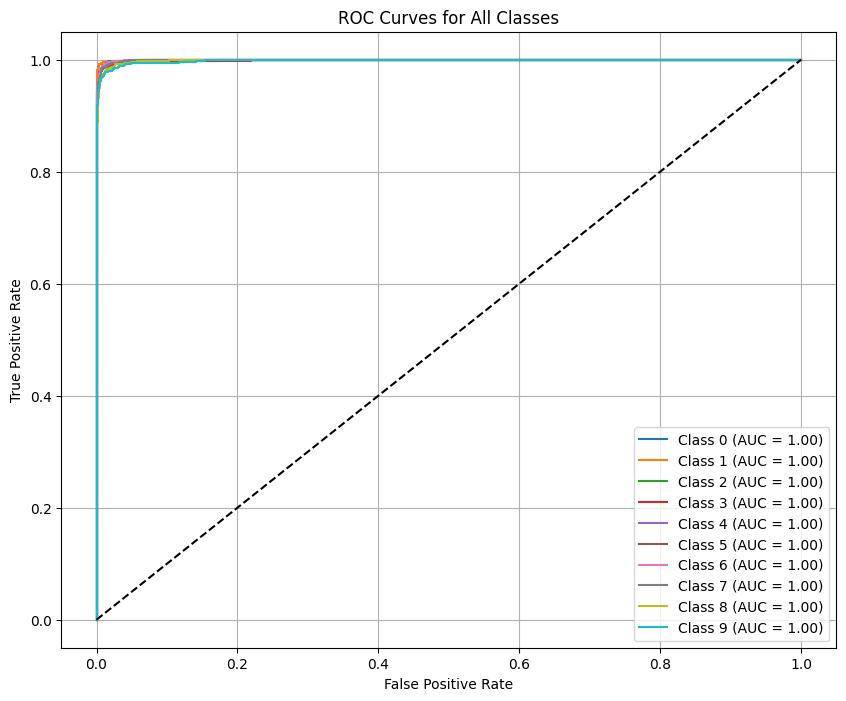

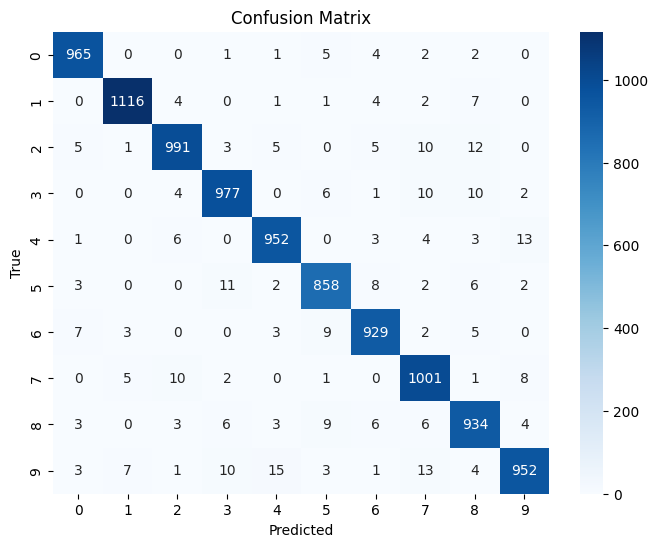

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode targets
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile with RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print trainable parameters
model.summary()

# Train model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Predict
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

test_accuracy = np.mean(y_pred_classes == y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accuracy table
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print("\nAccuracy Table:")
print(f"{'Metric':<20}{'Value':<10}")
print(f"{'-'*30}")
print(f"{'Training Accuracy':<20}{train_acc:.4f}")
print(f"{'Validation Accuracy':<20}{val_acc:.4f}")
print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")

# ROC AUC Score (One-vs-Rest)
roc_auc = roc_auc_score(y_test_cat, y_pred_probs, multi_class='ovr')
print(f"\nROC AUC Score (OvR): {roc_auc:.4f}")

# ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_probs[:, i])
    auc_score = roc_auc_score(y_test_cat[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


How to Explain the Code (Line by Line)
Data Loading & Preprocessing:

MNIST images loaded, normalized (scaled between 0–1), and labels one-hot encoded.

Model Construction:

A simple 3-layer DNN using ReLU and softmax activations.

Input: Flattened 28×28 images.

Model Compilation:

Optimizer: RMSprop (good for non-stationary problems)

Learning rate: 0.0001 (low, for stability)

Loss: Categorical cross-entropy (for multi-class classification)

Model Training:

10 epochs, with batch size 32

10% of training data used for validation

Predictions & Evaluation:

Class predictions and class probabilities computed

Accuracy, classification report, ROC AUC, confusion matrix

Trainable Parameters:

Automatically shown via model.summary() — includes weights + biases of all layers

Plotting:

ROC Curves for all 10 classes

Confusion Matrix for visualizing classification errors

📊 How to Read the Plots
1. ROC Curves:
Each curve shows the classifier's performance for one class.

Closer the curve is to the top-left corner, the better the classifier.

AUC = 1: perfect classifier; AUC = 0.5: random guessing.

2. Confusion Matrix:
Diagonal values = correct predictions.

Off-diagonal = misclassifications.

Look for strong diagonal dominance → high accuracy.

#*Conclusion*

ROC AUC gives a more detailed, threshold-independent view of classifier performance.

Trainable parameters indicate model complexity — larger models can overfit.